In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from apyori import apriori
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


In [2]:
dataPath = "/home/youngjai/yjGit/bayesProgramming/data/dataset.csv"
df = pd.read_csv(dataPath)
df = df.drop(["index"], axis=1)


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [4]:
for col in xcols:
    df[col] =df[col].astype(str)
dummied = pd.get_dummies(df, drop_first=True) 

In [5]:
xcols

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [6]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Result                         11055 non-null  int64
 1   having_IPhaving_IP_Address_1   11055 non-null  uint8
 2   URLURL_Length_0                11055 non-null  uint8
 3   URLURL_Length_1                11055 non-null  uint8
 4   Shortining_Service_1           11055 non-null  uint8
 5   having_At_Symbol_1             11055 non-null  uint8
 6   double_slash_redirecting_1     11055 non-null  uint8
 7   Prefix_Suffix_1                11055 non-null  uint8
 8   having_Sub_Domain_0            11055 non-null  uint8
 9   having_Sub_Domain_1            11055 non-null  uint8
 10  SSLfinal_State_0               11055 non-null  uint8
 11  SSLfinal_State_1               11055 non-null  uint8
 12  Domain_registeration_length_1  11055 non-null  uint8
 13  Favicon_1       

In [7]:
for col in xcols:
    if df[col].unique().shape[0] > 2:
        print(col)

URLURL_Length
having_Sub_Domain
SSLfinal_State
URL_of_Anchor
Links_in_tags
SFH
web_traffic
Links_pointing_to_page


In [8]:
xcols = dummied.columns[1:]
ycol = dummied.columns[0]
ycol

'Result'

In [13]:
trainX

,having_IPhaving_IP_Address_1,URLURL_Length_0,URLURL_Length_1,Shortining_Service_1,having_At_Symbol_1,double_slash_redirecting_1,Prefix_Suffix_1,having_Sub_Domain_0,having_Sub_Domain_1,SSLfinal_State_0,...,Iframe_1,age_of_domain_1,DNSRecord_1,web_traffic_0,web_traffic_1,Page_Rank_1,Google_Index_1,Links_pointing_to_page_0,Links_pointing_to_page_1,Statistical_report_1
197,1,0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
7650,0,0,1,1,1,1,0,1,0,1,...,1,1,1,0,0,0,1,0,0,1
10486,1,0,0,1,1,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
9078,0,0,0,1,0,1,1,0,1,0,...,0,1,1,1,0,0,1,0,1,1
10691,0,0,1,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,0,0,0,1,1,1,0,0,1,0,...,1,1,1,0,1,0,1,1,0,1
5459,1,0,0,1,1,1,0,0,0,0,...,1,0,1,0,1,0,1,1,0,1
5298,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
7575,0,0,0,1,1,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,1


In [15]:

dummied_y = np.where(dummied[ycol] == -1, 0 ,1)
trainX, testX, trainY, testY = train_test_split(dummied[xcols], dummied_y, test_size = 0.25)

In [20]:
trainY

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
lr_model = sm.Logit(trainY, trainX)
result = lr_model.fit(method = "bfgs")


         Current function value: 0.157610
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/youngjai/pythonVenv/tensorflow1/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8291
Model:                          Logit   Df Residuals:                     8253
Method:                           MLE   Df Model:                           37
Date:                Thu, 14 May 2020   Pseudo R-squ.:                  0.7706
Time:                        22:29:19   Log-Likelihood:                -1306.7
converged:                      False   LL-Null:                       -5695.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
having_IPhaving_IP_Address_1      1.5674      0.153     10.264      0.000       1.268       1.867
URLURL_Length_0                  -0.5151      0.498     -1.034      0.301      -1.491       0.461
URLURL_Length_1                  -0.3701      0.177     -2.096      0.036      -0.716      -0.024
Shortining_Service_1             -1.5109      0.360     -4.200      0.000      -2.216      -0.806
having_At_Symbol_1                0.0958      0.188      0.508      0.611      -0.274       0.465
double_slash_redirecting_1       -0.7302      0.386     -1.890      0.059      -1.487       0.027
Prefix_Suffix_1                   3.7664      0.436      8.634      0.000       2.911       4.621
having_Sub_Domain_0              -0.3088      0.126     -2.445      0.014      -0.556      -0.061
having_Sub_Domain_1               1.3471      0.134     10.076      0.000       1.085       1.609
SSLfinal_State_0                 -2.2061      0.320     -6.884      0.000      -2.834      -1.578
SSLfinal_State_1                  3.1517      0.119     26.384      0.000       2.918       3.386
Domain_registeration_length_1    -0.9466      0.139     -6.834      0.000      -1.218      -0.675
Favicon_1                        -0.1471      0.440     -0.334      0.738      -1.009       0.715
port_1                           -0.0765      0.357     -0.214      0.830      -0.775       0.623
HTTPS_token_1                    -0.9181      0.267     -3.435      0.001      -1.442      -0.394
Request_URL_1                     0.0121      0.131      0.093      0.926      -0.244       0.268
URL_of_Anchor_0                   3.8490      0.202     19.097      0.000       3.454       4.244
URL_of_Anchor_1                   5.2819      0.240     22.036      0.000       4.812       5.752
Links_in_tags_0                   1.3652      0.119     11.430      0.000       1.131       1.599
Links_in_tags_1                   0.8308      0.138      6.037      0.000       0.561       1.101
SFH_0                             1.1556      0.219      5.266      0.000       0.725       1.586
SFH_1                             1.4007      0.184      7.614      0.000       1.040       1.761
Submitting_to_email_1             0.3039      0.232      1.311      0.190      -0.151       0.758
Abnormal_URL_1                   -0.9223      0.300     -3.077      0.002      -1.510      -0.335
Redirect_1                       -2.0039      0.221     -9.075      0.000      -2.437      -1.571
on_mouseover_1                    0.1432      0.301      0.475      0.634      -0.447       0.734
RightClick_1                     -2.0437      0.336     -6.081      0.000      -2.702      -1.385
popUpWidnow_1                     0.1491      0.428      0.349      0.727      -0.689       0.987
Iframe_1                         -0.8263      0.347     -2.378      0.017      -1.507      -0.145
age_of_domain_1                  -0.3039      0.112     -2.726      0.006      -0.522      -0.085
DNSReco

# GBT 

In [33]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=25) # 기본값: max_depth=3, learning_rate=0.1
gbc.fit(trainX, trainY)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=25,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
score_train = gbc.score(trainX, trainY) # train set 정확도

print('{:.3f}'.format(score_train))




score_test = gbc.score(testX, testY) # 일반화 정확도

print('{:.3f}'.format(score_test))


0.991
0.960


In [46]:
len(trainX.columns)

38

In [47]:
len(gbc.feature_importances_)


38

In [53]:
impt_dict = {}
for idx in range(0, 38):
    impt_dict[idx] = gbc.feature_importances_[idx]

result = {k: v for k, v in sorted(impt_dict.items(), key=lambda item: item[1])}  
result

{1: 0.00048458780092724784,
 28: 0.0013006546307178972,
 37: 0.002366319857892245,
 26: 0.002415268441841885,
 25: 0.002758958477537343,
 23: 0.002987405335357466,
 12: 0.0030238799072014825,
 24: 0.0033622223020623823,
 4: 0.003391518275671762,
 20: 0.0034151049477153805,
 27: 0.003553990238184771,
 5: 0.0035765184093497424,
 13: 0.0037189842888629,
 14: 0.004214643728172628,
 35: 0.005157270765903826,
 22: 0.005914243487131826,
 9: 0.006832908844182492,
 21: 0.006844971138392429,
 32: 0.006944400420766316,
 33: 0.006959418723678603,
 3: 0.007027681133765019,
 30: 0.007505525698210758,
 0: 0.00879929211979953,
 36: 0.00893533272328492,
 7: 0.00900175057537139,
 19: 0.010529493222844275,
 15: 0.010541553203967132,
 2: 0.011507224278967472,
 34: 0.011725083288862298,
 18: 0.013037430356812924,
 11: 0.01603617064814119,
 29: 0.017245877139572898,
 8: 0.019677737540499732,
 17: 0.034478177490443226,
 31: 0.035580303819272914,
 6: 0.037560452413289036,
 16: 0.05202592537431715,
 10: 0.6095

In [65]:
top_columns = []
impt = []
for idx in range(31, 38):
    temp = list(result)[idx]
    impt.append(result[temp])
    top_columns.append(trainX.columns[list(result)[idx]])
    

29 : 0.017245877139572898
8 : 0.019677737540499732
17 : 0.034478177490443226
31 : 0.035580303819272914
6 : 0.037560452413289036
16 : 0.05202592537431715
10 : 0.6095617189510275


In [79]:
indices

array([10, 16,  6, 31, 17,  8, 29, 11, 18, 34,  2, 15, 19,  7, 36,  0, 30,
        3, 33, 32, 21,  9, 22, 35, 14, 13,  5, 27, 20,  4, 24, 12, 23, 25,
       26, 37, 28,  1])

Feature ranking:
SSLfinal_State_1. : (0.609562)
URL_of_Anchor_0. : (0.052026)
Prefix_Suffix_1. : (0.037560)
web_traffic_0. : (0.035580)
URL_of_Anchor_1. : (0.034478)
having_Sub_Domain_1. : (0.019678)
age_of_domain_1. : (0.017246)
Domain_registeration_length_1. : (0.016036)
Links_in_tags_0. : (0.013037)
Google_Index_1. : (0.011725)


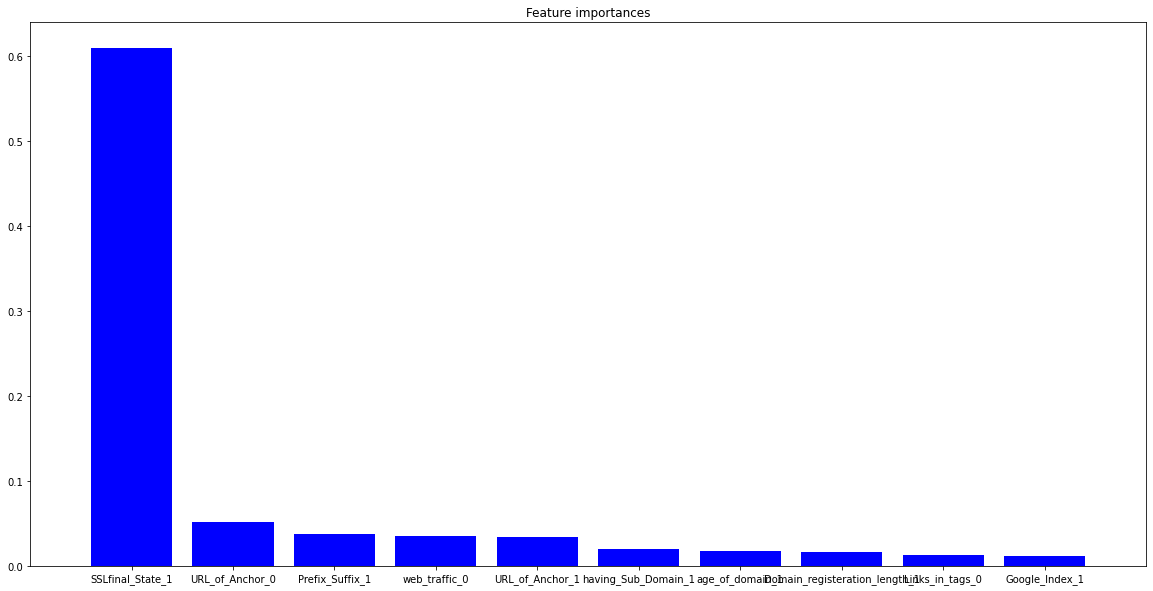

In [84]:

importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%s. : (%f)" % ( trainX.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar( trainX.columns[indices[:10]], importances[indices[:10]],
        color="b", align="center")
plt.xticks(range(10), trainX.columns[indices[:10]])
plt.xlim([-1, 10])
plt.show()

In [20]:


def getRules(df):
    assocDf = []
    num_records = len(df)
    for r in range(0, num_records):
        aRecord = []
        for col in df.columns:
             if df[col][r] == 1:
                    aRecord.append(col)
        assocDf.append(aRecord)
    return apriori(assocDf, min_support = 0.2, min_confidence=0.4, min_lift = 2,
                max_length = 6)    
    


In [21]:
maliciousDf = df[df["Result"] == -1]
benignDf = df[df["Result"] !=-1]


In [35]:
assocDf = []
num_records = len(benignDf)
for r in range(0, num_records):
    aRecord = []
    for col in df.columns:
        if df[col][r] == 1:
            aRecord.append(col)
    assocDf.append(aRecord)
benignRule = apriori(assocDf, min_support = 0.5, min_confidence=0.6, min_lift = 2, min_length =3,
                max_length = 6)        

In [37]:
dd = list(benignRule)

KeyboardInterrupt: 

In [ ]:
malResults

## K-means clustering 

In [ ]:
# data-processing 



In [ ]:
ks = range(1, 10)

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(feature)